In [187]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import (LarsCV, LassoLarsCV, ElasticNetCV, LassoLarsIC)

In [188]:
X,y = load_diabetes(return_X_y=True)
rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 20)]  # add some bad features

## Plots

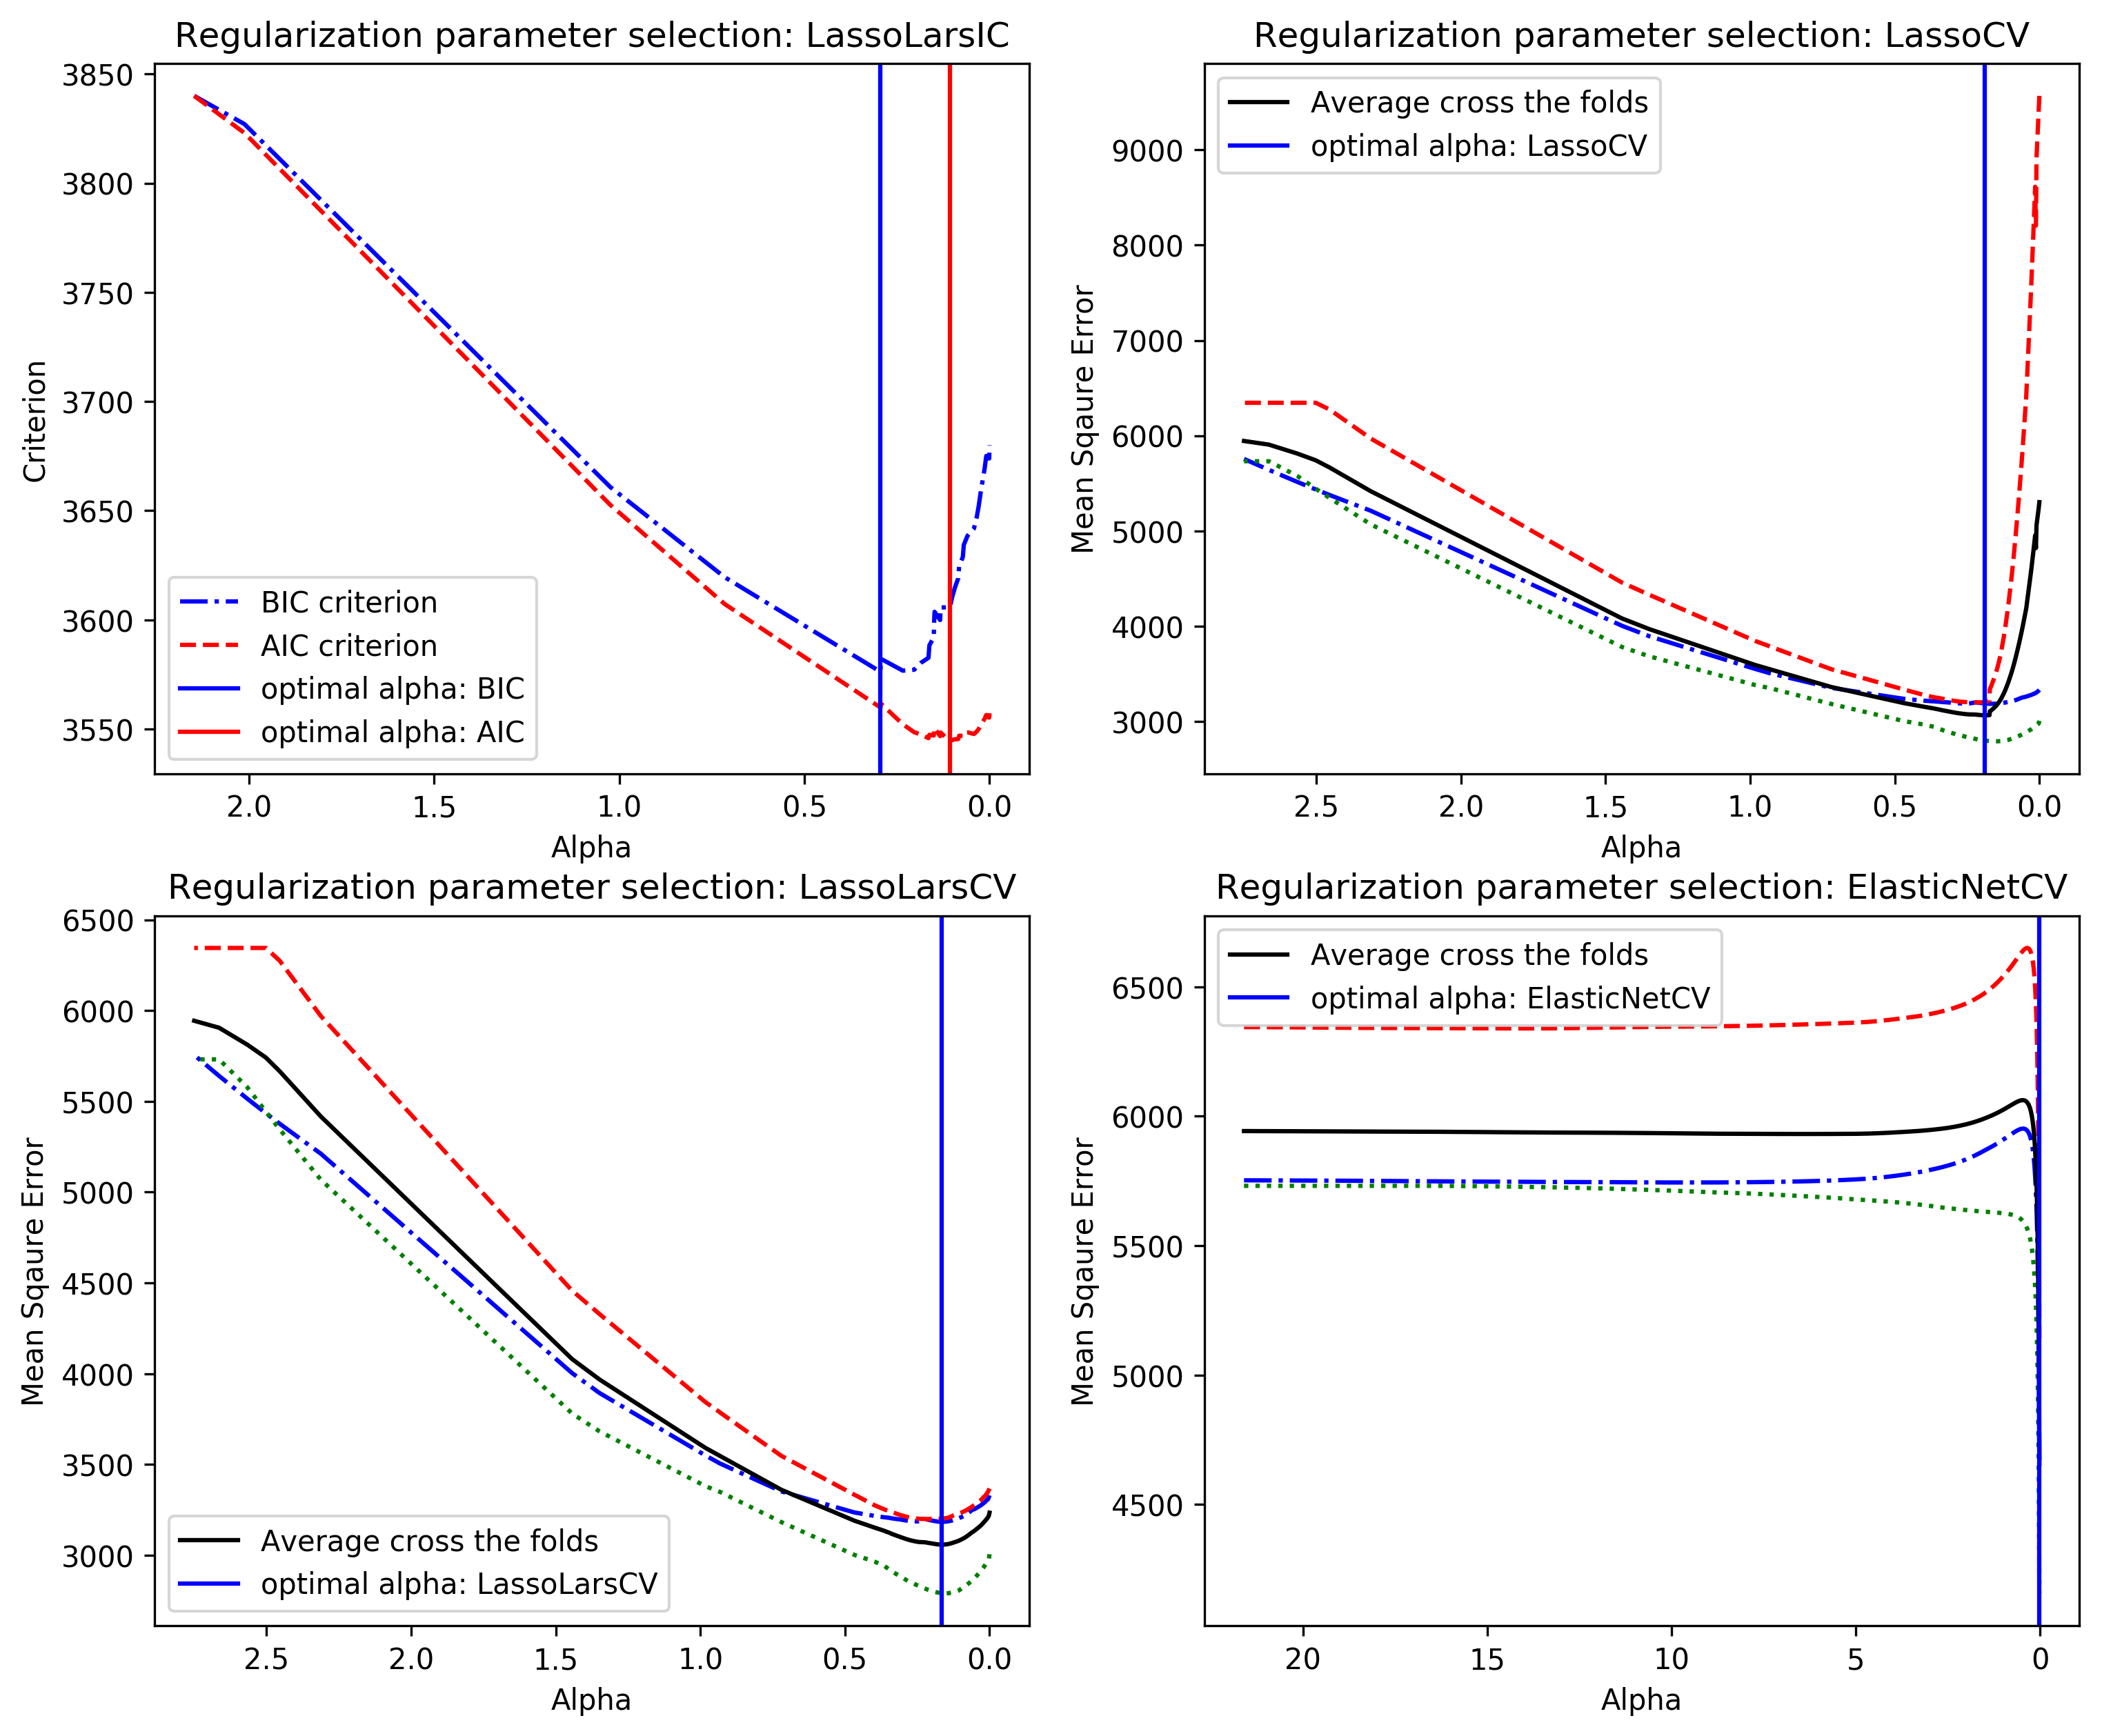

In [190]:
fig, splots = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.set_dpi(300)
sp1 = splots[0, 0]
sp2 = splots[0, 1]
sp3 = splots[1, 0]
sp4 = splots[1, 1]

# LassoLarsIC plot
llic_bic = LassoLarsIC(criterion='bic')
llic_bic.fit(X, y)
llic_aic = LassoLarsIC(criterion='aic')
llic_aic.fit(X, y)
l1, = sp1.plot(llic_bic.alphas_, llic_bic.criterion_, linestyle='-.', c='b')
l2, = sp1.plot(llic_aic.alphas_, llic_aic.criterion_, linestyle='--', c='r')
l3 = sp1.axvline(llic_bic.alpha_, c='b')
l4 = sp1.axvline(llic_aic.alpha_, c='r')
sp1.axes.invert_xaxis()
sp1.legend((l1, l2, l3, l4), ('BIC criterion', 'AIC criterion', 'optimal alpha: BIC', 'optimal alpha: AIC'))
sp1.set_title('Regularization parameter selection: LassoLarsIC')
sp1.set_xlabel('Alpha')
sp1.set_ylabel('Criterion')


# LassoCV
lcv = LarsCV()
lcv.fit(X, y)
line_settings = [(0, '-.', 'b'),
                 (1, '--', 'r'),
                 (2, ':', 'g')]
for i, l, c in line_settings:
    sp2.plot(lcv.cv_alphas_, lcv.cv_mse_path_[:, i], linestyle=l, c=c)
sp2.plot(lcv.cv_alphas_, lcv.cv_mse_path_.mean(axis=1), c='black', label='Average cross the folds')
sp2.axvline(lcv.alpha_, c='b', label='optimal alpha: LassoCV')
sp2.axes.invert_xaxis()
sp2.legend()
sp2.set_title('Regularization parameter selection: LassoCV')
sp2.set_xlabel('Alpha')
sp2.set_ylabel('Mean Sqaure Error')

# LassoLarsCV
llcv = LassoLarsCV()
llcv.fit(X, y)
for i, l, c in line_settings:
    sp3.plot(llcv.cv_alphas_, llcv.cv_mse_path_[:, i], linestyle=l, c=c)
sp3.plot(llcv.cv_alphas_, llcv.cv_mse_path_.mean(axis=1), c='black', label='Average cross the folds')
sp3.axvline(llcv.alpha_, c='b', label='optimal alpha: LassoLarsCV')
sp3.axes.invert_xaxis()
sp3.legend()
sp3.set_title('Regularization parameter selection: LassoLarsCV')
sp3.set_xlabel('Alpha')
sp3.set_ylabel('Mean Sqaure Error')

# ElasticNetCV
ecv = ElasticNetCV(0.5)
ecv.fit(X, y)
for i, l, c in line_settings:
    sp4.plot(ecv.alphas_, ecv.mse_path_[:, i], linestyle=l, c=c)
sp4.plot(ecv.alphas_, ecv.mse_path_.mean(axis=1), c='black', label='Average cross the folds')
sp4.axvline(ecv.alpha_, c='b', label='optimal alpha: ElasticNetCV')
sp4.axes.invert_xaxis()
sp4.legend()
sp4.set_title('Regularization parameter selection: ElasticNetCV')
sp4.set_xlabel('Alpha')
sp4.set_ylabel('Mean Sqaure Error')

plt.show()